<a href="https://colab.research.google.com/github/rohankhadgi33/BWH2-Particle-Systems/blob/main/Processing%20DSA/particles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload distance_field.json file from Files in left part of Colab page and run the program. It will create new particles in distance field and save their coordinates in new json file.


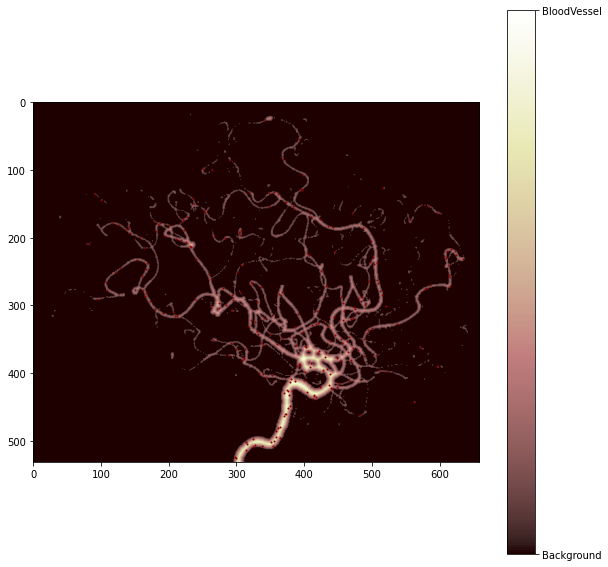

In [2]:
import numpy as np
import json
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt
from skimage.morphology import medial_axis
from skimage.util import invert
from skimage.color import rgb2gray, rgba2rgb
from skimage.feature import peak_local_max
from skimage.filters import gaussian


def save_json(filename, data):
    with open(filename, 'w') as f:
        json.dump(data.tolist(), f)



def display_particles(particles, distanceField):
    fig, ax = plt.subplots(figsize=(10, 10))
    c = ax.scatter(particles[:, 1], particles[:, 0], s=1, c = 'darkred')
    im = ax.imshow(distanceField, cmap='pink')
    ax.set_xlim([0, distanceField.shape[1]])
    ax.set_ylim([distanceField.shape[0], 0])
    cbar = fig.colorbar(im)
    cbar.set_ticks([0, np.max(distanceField)])
    cbar.set_ticklabels(['Background', 'BloodVessel'])    
    plt.show()




# Load the distance field from the JSON file
with open('distance_field.json', 'r') as f:
    distanceFieldData = json.load(f)
distanceField = np.array(distanceFieldData)

# Define the radius of the particles and the minimum distance between them
radius = 1.0
min_distance = 2 * radius



# Define the shape of the region to sample from
height, width = distanceField.shape

# Create a grid of cells with spacing r/sqrt(2)
cell_size = min_distance / np.sqrt(2)
grid_width = int(np.ceil(width / cell_size))
grid_height = int(np.ceil(height / cell_size))
grid = np.empty((grid_height, grid_width), dtype=object)

# Sample the first point randomly
x = np.random.uniform(0, width)
y = np.random.uniform(0, height)
point = (y, x)

# Add the first point to the grid
grid_x = int(x / cell_size)
grid_y = int(y / cell_size)
grid[grid_y, grid_x] = [point]

# Create a list of active points
active = [point]

# Choose a random active point
idx = np.random.randint(len(active))
point = active[idx]



# Sample new points around the active point
particles = np.empty((0, 2))
for i in range(1000):
    # Choose a random nonzero point in the distance field
    nonzero_points = np.transpose(np.nonzero(distanceField))
    point = nonzero_points[np.random.choice(len(nonzero_points))]
    x, y = point
    if (x, y) in particles:
        continue
    else:
        particles = np.vstack([particles, (x, y)])
save_json("new.json", particles)            
display_particles(particles, distanceField)
